## Scenario 1 Phase 1

In [89]:
from patsy import dmatrices
import pandas as pd
import seaborn as sns
import statsmodels.api as sma
import statsmodels as sm
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [91]:
data = pd.read_excel("Data/simulation_results_S1P1_04.xlsx")

In [101]:
data

,Unnamed: 0,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,0,1,...,15,16,17,18,19,20,21,22,23,24
0,0,0.818786,0.4,0.853808,1.503849,scenario1_phase1,False,0.489612,5000,5015,...,9911,10003,10094,10169,10223,10272,10313,10345,10371,10391
1,1,0.818786,0.4,0.775647,2.225495,scenario1_phase1,False,0.465135,5000,5024,...,9962,10077,10182,10249,10310,10375,10402,10431,10454,10472
2,2,0.818786,0.4,0.918257,2.384395,scenario1_phase1,False,0.499011,5000,5022,...,9934,10033,10129,10195,10264,10315,10355,10380,10401,10411
3,3,0.818786,0.4,0.709613,2.383168,scenario1_phase1,False,0.444904,5000,5015,...,10046,10170,10257,10313,10369,10420,10462,10487,10513,10544
4,4,0.818786,0.4,0.708918,2.359106,scenario1_phase1,True,0.463985,5000,5023,...,10060,10169,10268,10353,10416,10465,10511,10532,10564,10591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.818786,0.4,0.752725,2.084991,scenario1_phase1,True,0.052288,5000,5019,...,10128,10247,10336,10421,10487,10528,10577,10607,10637,10660
96,96,0.818786,0.4,0.757014,1.678113,scenario1_phase1,True,0.095248,5000,5023,...,10261,10368,10475,10553,10643,10715,10760,10803,10834,10862
97,97,0.818786,0.4,0.845273,2.381292,scenario1_phase1,True,0.257565,5000,5023,...,9940,10058,10162,10241,10300,10344,10396,10442,10472,10493
98,98,0.818786,0.4,0.835446,2.239624,scenario1_phase1,False,0.306119,5000,5018,...,9985,10106,10178,10246,10307,10358,10401,10429,10461,10481


In [92]:
infection_counts = [str(i) for i in range(25)]

Text(0.5, 1.0, 'Total Infected')

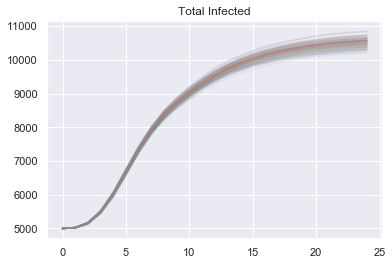

In [93]:
for _ in range(data.shape[0]):
    plt.plot(range(25), data[infection_counts].iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

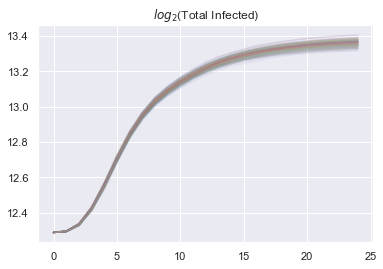

In [94]:
for _ in range(data.shape[0]):
    plt.plot(range(25), data[infection_counts].iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

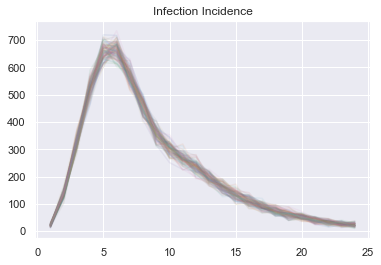

In [95]:
for _ in range(data.shape[0]):
    plt.plot(range(25), data[infection_counts].iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

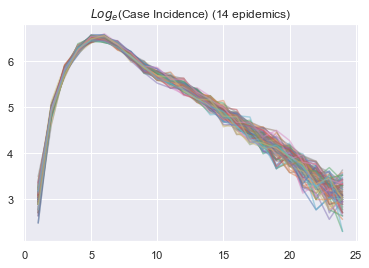

In [96]:
for _ in range(data.shape[0]):
    plt.plot(range(25), data[infection_counts].iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
plt.savefig("Figures/Log_case_incidence.png")

In [97]:
log_diff = data[infection_counts].iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:25],
    "time": list(range(10, 25))
}
dataframe = pd.DataFrame(data_set_up)

In [98]:
data_subset = data[infection_counts]
growth_rates = []
for _ in range(data.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe = pd.DataFrame(data_set_up)
    dataframe = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe)
    model = sma.OLS(y, X)
    res = model.fit()
    growth_rates.append(res.params[1])

    #fig = sm.graphics.regressionplots.plot_fit(res, 1)
    
    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [99]:
data_pars = data[infection_counts]
growth_rate_series = pd.Series(growth_rates)
data_pars["growth_rate"] = growth_rate_series

C:\Users\mfyles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Distribution of growth rates (S1P1, 0.8, Full Adherence)')

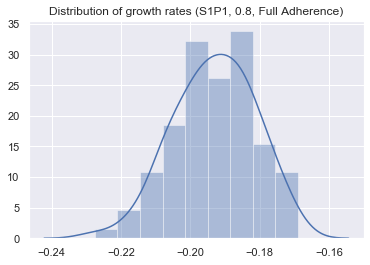

In [100]:
sns.distplot(growth_rate_series)
plt.title("Distribution of growth rates (S1P1, 0.8, Full Adherence)")

In [130]:
data_2 = pd.read_excel("Data/simulation_results_S1P1_08.xlsx")

In [131]:
data_2

,Unnamed: 0,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,0,1,...,15,16,17,18,19,20,21,22,23,24
0,0,0.81203,0.8,0.815038,1.736916,scenario1_phase1,True,0.473661,5000,5030,...,9461,9508,9556,9594,9613,9629,9641,9649,9655,9660
1,1,0.81203,0.8,0.738503,2.293688,scenario1_phase1,True,0.366449,5000,5016,...,9546,9617,9666,9695,9728,9740,9758,9766,9774,9784
2,2,0.81203,0.8,0.916342,2.256365,scenario1_phase1,False,0.437834,5000,5024,...,9321,9378,9407,9452,9471,9491,9500,9509,9517,9518
3,3,0.81203,0.8,0.851801,2.468968,scenario1_phase1,True,0.155026,5000,5025,...,9441,9509,9547,9584,9611,9633,9648,9662,9668,9672
4,4,0.81203,0.8,0.814744,2.222845,scenario1_phase1,True,0.455049,5000,5020,...,9462,9521,9554,9579,9598,9622,9637,9653,9664,9669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.81203,0.8,0.843839,1.813778,scenario1_phase1,False,0.138833,5000,5026,...,9525,9593,9630,9667,9703,9721,9735,9744,9755,9761
96,96,0.81203,0.8,0.723235,2.050086,scenario1_phase1,True,0.225155,5000,5029,...,9494,9541,9597,9642,9664,9686,9696,9702,9709,9713
97,97,0.81203,0.8,0.773955,1.945937,scenario1_phase1,False,0.148369,5000,5026,...,9412,9456,9508,9536,9549,9570,9591,9605,9608,9615
98,98,0.81203,0.8,0.905852,1.564856,scenario1_phase1,False,0.018903,5000,5028,...,9575,9642,9674,9709,9732,9747,9756,9763,9773,9778


In [132]:
infection_counts = [str(i) for i in range(25)]

Text(0.5, 1.0, 'Total Infected')

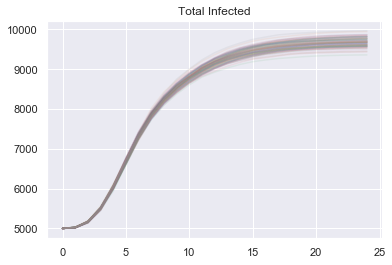

In [133]:
for _ in range(data_2.shape[0]):
    plt.plot(range(25), data_2[infection_counts].iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

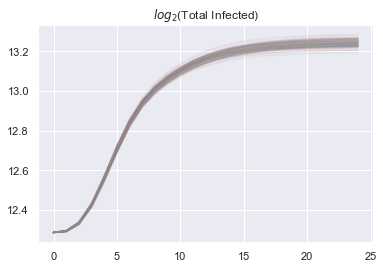

In [134]:
for _ in range(data_2.shape[0]):
    plt.plot(range(25), data_2[infection_counts].iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

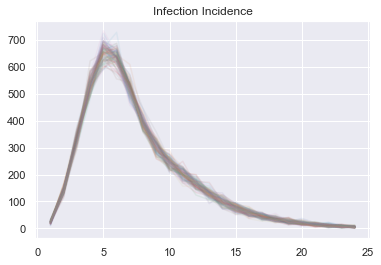

In [135]:
for _ in range(data_2.shape[0]):
    plt.plot(range(25), data_2[infection_counts].iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

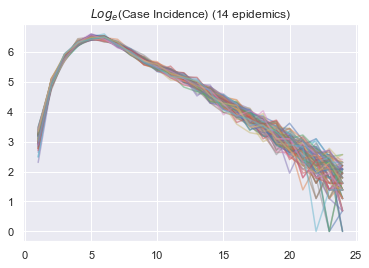

In [136]:
for _ in range(data_2.shape[0]):
    plt.plot(range(25), data_2[infection_counts].iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
plt.savefig("Figures/Log_case_incidence.png")

In [137]:
log_diff_2 = data_2[infection_counts].iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:25],
    "time": list(range(10, 25))
}
dataframe_2 = pd.DataFrame(data_set_up)

In [144]:
data_subset_2 = data_2[infection_counts].drop(51)
growth_rates_2 = []
for _ in range(data_subset_2.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset_2.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe_2 = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe_2)
    model = sma.OLS(y, X)
    res = model.fit()
    growth_rates_2.append(res.params[1])

    #fig = sm.graphics.regressionplots.plot_fit(res, 1)
    
    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [145]:
data_pars_2 = data_2[infection_counts]
growth_rate_series_2 = pd.Series(growth_rates_2)
data_pars_2["growth_rate"] = growth_rate_series_2

C:\Users\mfyles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [146]:
growth_rate_series_2

0    -0.290476
1    -0.267236
2    -0.315575
3    -0.278546
4    -0.259324
        ...   
94   -0.266391
95   -0.297957
96   -0.281052
97   -0.290409
98   -0.331972
Length: 99, dtype: float64

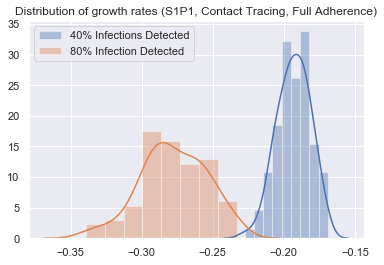

In [154]:
sns.distplot(growth_rate_series)
sns.distplot(growth_rate_series_2)
plt.legend(("40% Infections Detected", "80% Infection Detected"))
plt.title("Distribution of growth rates (S1P1, Contact Tracing, Full Adherence)")
plt.savefig("Figures/Growth_Rates_S1P1.png")